In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
dataset = pd.read_csv('./Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
print(X_train)

[[ 0.87668336  0.79842885  0.64412971 ...  0.0290166  -1.06412236
  -0.2059076 ]
 [-0.36659076 -0.7581304  -0.39779858 ...  0.0290166  -0.73083231
  -0.81704676]
 [-1.69689407 -0.34424759 -0.32337513 ...  0.90197362  0.51900537
  -1.31256499]
 ...
 [-0.70227477 -0.68615078 -0.65828065 ...  0.46549511  0.51900537
  -1.31256499]
 [ 1.13777093 -0.62316862 -0.91876272 ... -0.18922266  1.03282752
   0.80164614]
 [ 1.4610222   0.12361993  0.42085937 ... -1.45501034 -1.2168803
  -0.2719767 ]]


# Implement PCA to reduce Dimentionality

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [14]:
print(X_train)

[[-2.17884511e+00  1.07218467e+00]
 [-1.80819239e+00 -1.57822344e+00]
 [ 1.09829474e+00 -2.22124345e+00]
 [-2.55584748e+00  1.66210369e+00]
 [ 1.85698063e+00 -2.41573166e-01]
 [ 2.58288576e+00  1.37668170e+00]
 [ 8.72876119e-01 -2.25618512e+00]
 [-4.18384029e-01 -2.35415681e+00]
 [-3.04977245e-01 -2.27659433e+00]
 [ 2.14082532e+00  1.10052871e+00]
 [-2.98136465e+00  2.47159183e-01]
 [ 1.96188242e+00 -1.25407738e+00]
 [-2.16177795e+00  9.75966550e-01]
 [ 2.21976084e+00  2.39507167e+00]
 [-2.30179529e+00  2.05791962e-01]
 [-3.00953827e+00  2.79141212e-01]
 [ 2.63443473e+00  8.68313119e-01]
 [-1.09219965e+00  3.53906625e+00]
 [ 2.62578435e+00  2.96852840e-03]
 [ 1.98077342e-01 -2.29193443e+00]
 [-2.67442753e+00  2.58800132e+00]
 [-2.54763698e+00  4.52703891e-01]
 [ 1.77416736e+00 -8.43586940e-01]
 [-2.77786938e+00  4.32090258e-01]
 [-2.86679938e+00  1.87580875e+00]
 [ 1.35498845e+00 -3.99545184e-02]
 [-2.43900474e+00 -9.44074889e-02]
 [-2.27268121e+00 -5.05883053e-01]
 [ 1.17887166e+00 -2

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [16]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)}')

Confusion Matrix:
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Accuracy Score : 0.9722222222222222


C:\Users\minmy\AppData\Local\Temp\ipykernel_757940\3318974776.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


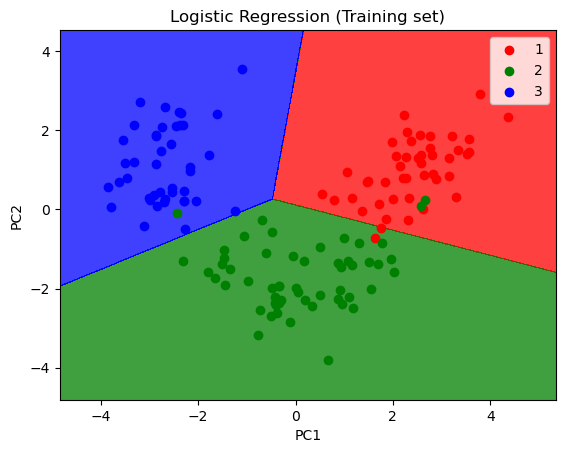

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()